## Main Task
In the insurance industry, predicting the likelihood of claims is critical for risk assessment and policy pricing. However, insurance claims datasets often exhibit class imbalance, with non-claims outnumbering actual claims. (Classification On A Highly Imbalanced Data)

**Imbalanced Data:** refers to a dataset where the classes are not represented equally. In a classification task, this typically means that one class (or a few classes) occurs much more frequently than others. For example, in a binary classification problem, you might have 95% of the data belonging to class A and only 5% to class B.  

### Challenges of Imbalanced Data:
1. **Bias Toward Majority Class:** Standard machine learning algorithms often assume a relatively equal class distribution. When faced with imbalanced data, these algorithms may be biased towards the majority class, leading to poor predictive performance on the minority class.

2. **Skewed Performance Metrics:** Traditional metrics like accuracy can be misleading in the context of imbalanced data. For instance, in the previous example, a model that always predicts class A would achieve 95% accuracy but would fail entirely to capture class B.

### Strategies to Handle Imbalanced Data:
#### Resampling Techniques:
1. **Oversampling:** Increasing the number of instances in the minority class by duplicating instances or generating synthetic data (e.g., using SMOTE - Synthetic Minority Over-sampling Technique).
2. **Undersampling:** Reducing the number of instances in the majority class to balance the dataset.
#### Algorithmic Solutions:
1. **Weighted Loss Functions:** Modify the loss function to give more importance to the minority class, which can help the model to pay more attention to it during training.
2. **Ensemble Methods:** Methods like Random Forest or Boosting can be adjusted to handle imbalanced data, such as by using balanced random forests or boosting with class weights.
3. **Anomaly Detection Techniques:** In cases where the minority class is extremely rare, anomaly detection methods might be more suitable.

### Data Understanding
The dataset has the following features:
1. policy_id: Unique identifier for the insurance policy.
2. subscription_length: The duration for which the insurance policy is active.
3. customer_age: Age of the insurance policyholder, which can influence the likelihood of claims.
4. vehicle_age: Age of the vehicle insured, which may affect the probability of claims due to factors like wear and tear.
5. model: The model of the vehicle, which could impact the claim frequency due to model-specific characteristics.
6. fuel_type: Type of fuel the vehicle uses (e.g., Petrol, Diesel, CNG), which might influence the risk profile and claim likelihood.
7. max_torque, max_power: Engine performance characteristics that could relate to the vehicle’s mechanical condition and claim risks.
8. engine_type: The type of engine, which might have implications for maintenance and claim rates.
9. displacement, cylinder: Specifications related to the engine size and construction, affecting the vehicle’s performance and potentially its claim history.
10. region_code: The code representing the geographical region of the policyholder, as claim patterns can vary regionally.
11. region_density: Population density of the policyholder’s region, which could correlate with accident and claim frequencies.
12. airbags: The number of airbags in the vehicle, indicating safety level which can influence claim probability.
13. is_esc (Electronic Stability Control), is_adjustable_steering, is_tpms (Tire Pressure Monitoring System): Features that enhance vehicle safety and could potentially reduce the likelihood of claims.
14. is_parking_sensors, is_parking_camera: Parking aids that might affect the probability of making a claim, especially in urban areas.
15. rear_brakes_type: Type of rear brakes, which could be related to the vehicle’s stopping capability and safety.
Features like steering_type, turning_radius, length, width, gross_weight, and various other binary indicators (Yes/No) for specific vehicle amenities and safety features, which together build a profile of the vehicle’s characteristics and its associated risk factors.
16. claim_status: Indicates whether a claim was made (1) or not (0), which is the dependent variable the model aims to predict.

In [30]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.utils import resample
from sklearn.ensemble import RandomForestClassifier
from sklearn.preprocessing import LabelEncoder

In [3]:
dataset = pd.read_csv('datasets/insurance claims data.csv')

In [4]:
dataset.head(2)

,policy_id,subscription_length,vehicle_age,customer_age,region_code,region_density,segment,model,fuel_type,max_torque,...,is_brake_assist,is_power_door_locks,is_central_locking,is_power_steering,is_driver_seat_height_adjustable,is_day_night_rear_view_mirror,is_ecw,is_speed_alert,ncap_rating,claim_status
0,POL045360,9.3,1.2,41,C8,8794,C2,M4,Diesel,250Nm@2750rpm,...,Yes,Yes,Yes,Yes,Yes,No,Yes,Yes,3,0
1,POL016745,8.2,1.8,35,C2,27003,C1,M9,Diesel,200Nm@1750rpm,...,No,Yes,Yes,Yes,Yes,Yes,Yes,Yes,4,0


In [5]:
dataset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 58592 entries, 0 to 58591
Data columns (total 41 columns):
 #   Column                            Non-Null Count  Dtype  
---  ------                            --------------  -----  
 0   policy_id                         58592 non-null  object 
 1   subscription_length               58592 non-null  float64
 2   vehicle_age                       58592 non-null  float64
 3   customer_age                      58592 non-null  int64  
 4   region_code                       58592 non-null  object 
 5   region_density                    58592 non-null  int64  
 6   segment                           58592 non-null  object 
 7   model                             58592 non-null  object 
 8   fuel_type                         58592 non-null  object 
 9   max_torque                        58592 non-null  object 
 10  max_power                         58592 non-null  object 
 11  engine_type                       58592 non-null  object 
 12  airb

In [6]:
dataset.shape

(58592, 41)

In [7]:
dataset.isnull().sum()

policy_id                           0
subscription_length                 0
vehicle_age                         0
customer_age                        0
region_code                         0
region_density                      0
segment                             0
model                               0
fuel_type                           0
max_torque                          0
max_power                           0
engine_type                         0
airbags                             0
is_esc                              0
is_adjustable_steering              0
is_tpms                             0
is_parking_sensors                  0
is_parking_camera                   0
rear_brakes_type                    0
displacement                        0
cylinder                            0
transmission_type                   0
steering_type                       0
turning_radius                      0
length                              0
width                               0
gross_weight

### Exploratory Data Analysis
#### Distribution of Claim Status

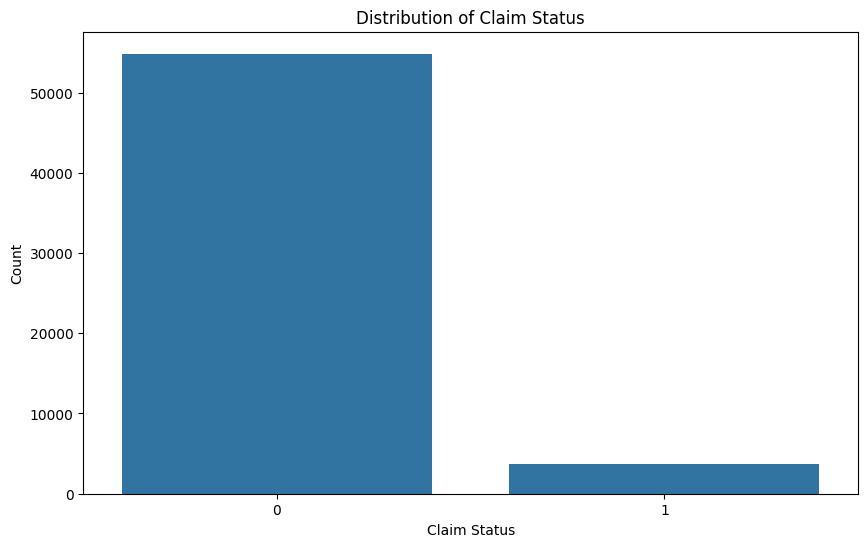

In [8]:
plt.figure(figsize=(10, 6))
sns.countplot(x='claim_status', data=dataset)
plt.title('Distribution of Claim Status')
plt.xlabel('Claim Status')
plt.ylabel('Count')
plt.show()

> The distribution of the claim_status shows a significant imbalance between the classes, with much fewer claims (1) compared to no claims (0)!
#### What is the distribution of 'claim_status' across different 'region_codes'?

In [9]:
claim_region = dataset.groupby(['region_code', 'claim_status']).size().reset_index(name='count')

In [10]:
# Pivoting for Easier Visualization
pivot_data = claim_region.pivot(index='region_code', columns='claim_status', values='count').fillna(0)
pivot_data['total'] = pivot_data.sum(axis=1)
pivot_data['claim_proportion'] = pivot_data[1] / pivot_data['total']

In [11]:
pivot_data.head()

claim_status,0,1,total,claim_proportion
region_code,,,,
C1,1392,76,1468,0.051771
C10,3007,148,3155,0.046910
C11,1140,72,1212,0.059406
C12,1502,87,1589,0.054751
C13,3228,195,3423,0.056968


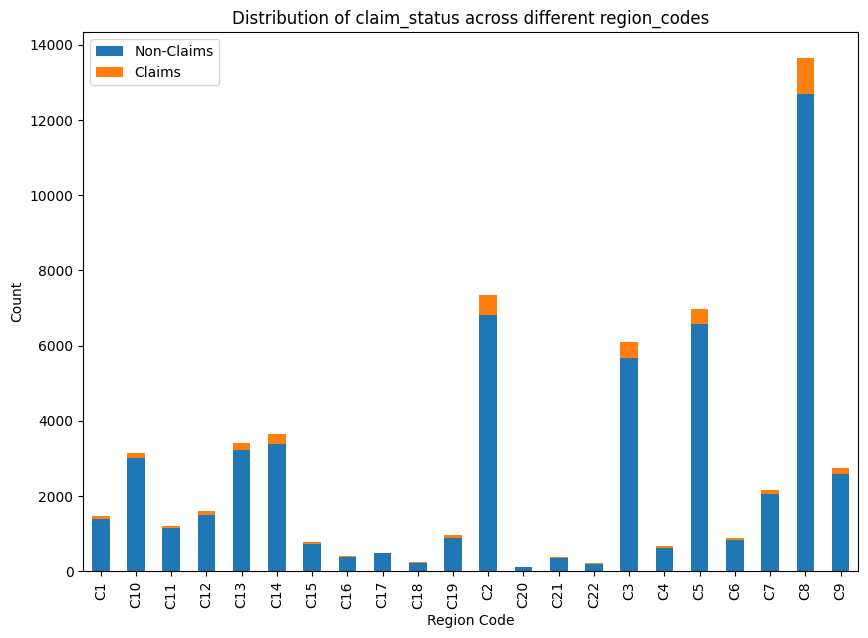

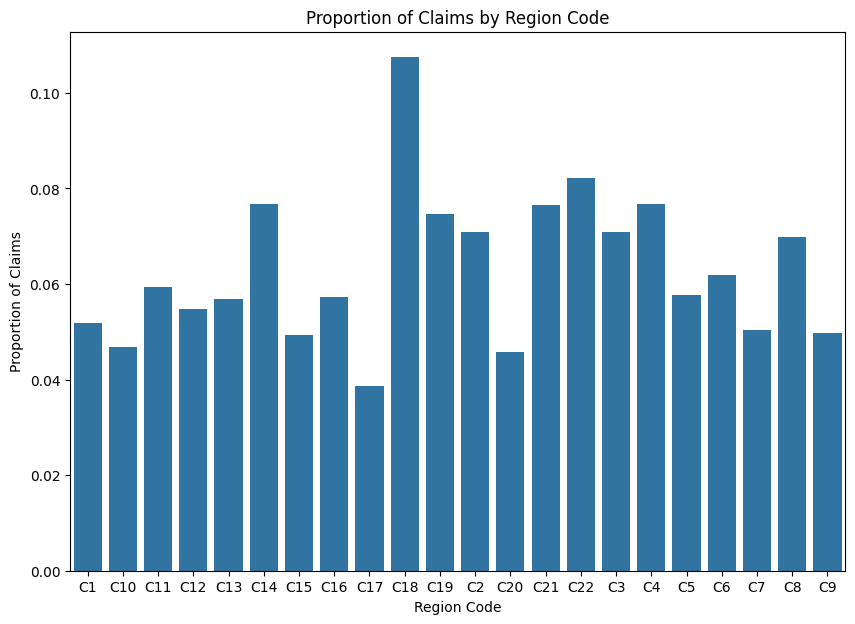

In [12]:
# Plot the raw counts
pivot_data[[0, 1]].plot(kind='bar', stacked=True, figsize=(10, 7))
plt.title('Distribution of claim_status across different region_codes')
plt.xlabel('Region Code')
plt.ylabel('Count')
plt.legend(['Non-Claims', 'Claims'])
plt.show()

# Plot the proportion of claims
plt.figure(figsize=(10, 7))
sns.barplot(x=pivot_data.index, y=pivot_data['claim_proportion'])
plt.title('Proportion of Claims by Region Code')
plt.xlabel('Region Code')
plt.ylabel('Proportion of Claims')
plt.show()

> Non-Claims clearly is dominant factor in each single region! Almost all the regions has some instances of claims!  
#### How does customer_age vary between policyholders who have made claims and those who have not?

In [13]:
# Group by 'claim_status' and calculate descriptive statistics for 'customer_age'
age_stats = dataset.groupby('claim_status')['customer_age'].describe()
print(age_stats)


                count       mean       std   min   25%   50%   75%   max
claim_status                                                            
0             54844.0  44.783623  6.920676  35.0  39.0  44.0  49.0  75.0
1              3748.0  45.413821  7.125381  35.0  40.0  44.0  50.0  72.0


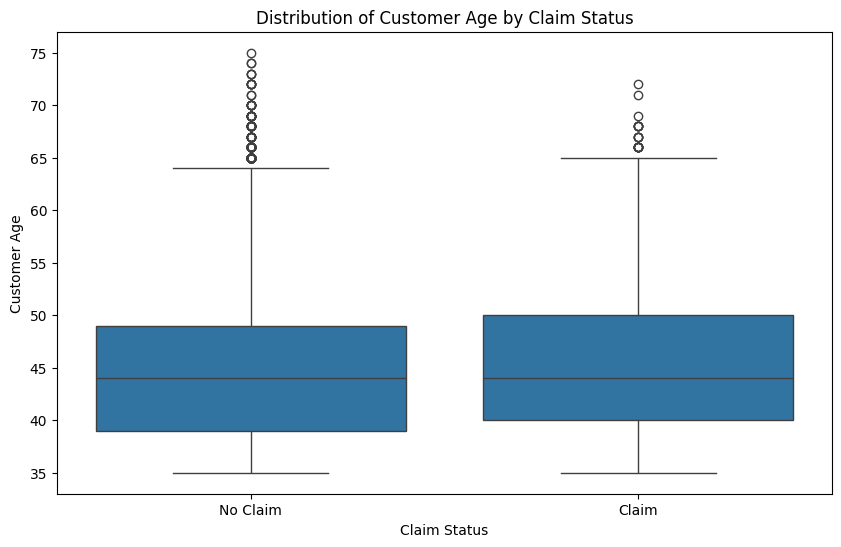

In [14]:
# Box plot for customer_age by claim_status
plt.figure(figsize=(10, 6))
sns.boxplot(x='claim_status', y='customer_age', data=dataset)
plt.title('Distribution of Customer Age by Claim Status')
plt.xlabel('Claim Status')
plt.ylabel('Customer Age')
plt.xticks([0, 1], ['No Claim', 'Claim'])
plt.show()

> The both groups have the mean values around 45 years. There are little bit more outliers in the No-Claim group!  
#### Is there a correlation between vehicle_age and the likelihood of a claim (claim_status)?

In [15]:
# Calculate the Pearson correlation between vehicle_age and claim_status
print(f'Correlation between vehicle_age and claim_status: {dataset['vehicle_age'].corr(dataset['claim_status'])}')

Correlation between vehicle_age and claim_status: -0.02817212592902115


> There is a small negative correlation between 'vehicle_age' and 'claim_status'!
#### How do the distributions of subscription_length differ for the two classes of claim_status?

In [16]:
# Descriptive statistics for subscription_length by claim_status
subscription_stats = dataset.groupby('claim_status')['subscription_length'].describe()
print(subscription_stats)

                count      mean       std  min  25%  50%   75%   max
claim_status                                                        
0             54844.0  6.026415  4.145695  0.0  2.0  5.6  10.4  14.0
1              3748.0  7.359472  3.892442  0.0  4.0  8.3  10.8  13.4


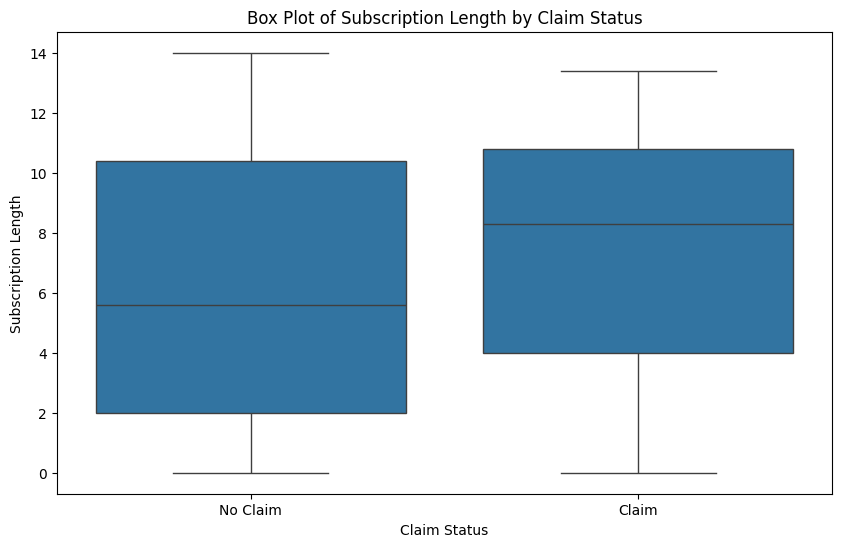

In [17]:
plt.figure(figsize=(10, 6))
sns.boxplot(x='claim_status', y='subscription_length', data=dataset)
plt.title('Box Plot of Subscription Length by Claim Status')
plt.xlabel('Claim Status')
plt.ylabel('Subscription Length')
plt.xticks([0, 1], ['No Claim', 'Claim'])
plt.show()

> The average subscription length is higher in the 'Claim' group! No Outliers in the groups! 
#### Distribution of 'Subscription_length', 'Vehicle_age', and 'Customer_age'

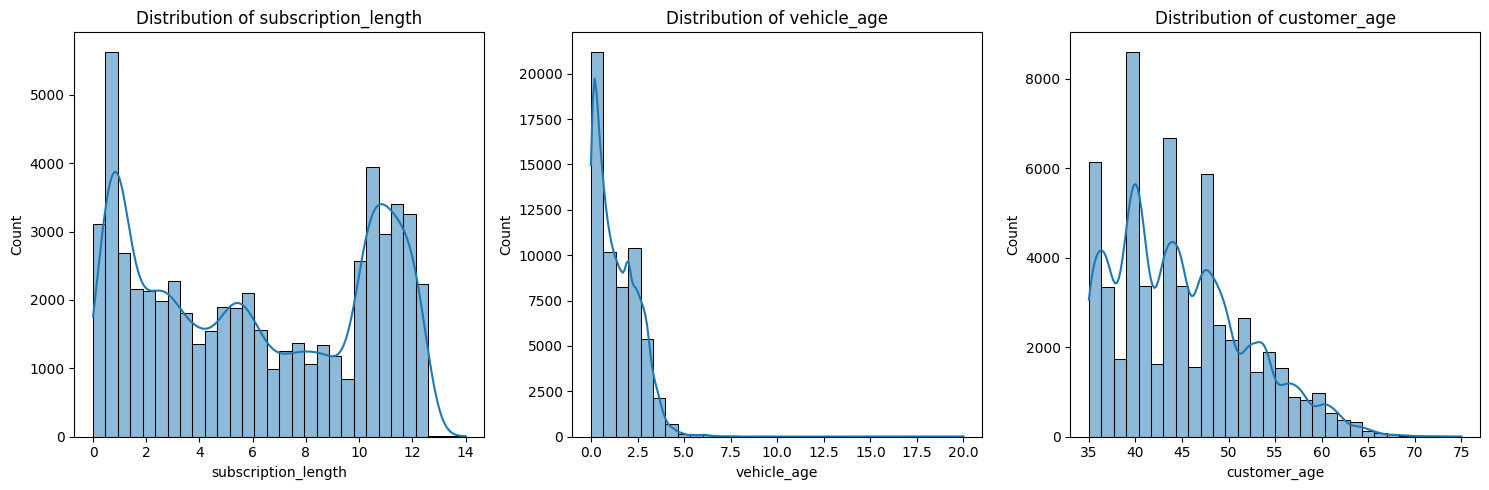

In [18]:
# selecting numerical columns for analysis
numerical_columns = ['subscription_length', 'vehicle_age', 'customer_age']

# plotting distributions of numerical features
plt.figure(figsize=(15, 5))
for i, column in enumerate(numerical_columns, 1):
    plt.subplot(1, 3, i)
    sns.histplot(dataset[column], bins=30, kde=True)
    plt.title(f'Distribution of {column}')

plt.tight_layout()
plt.show()

> subscription_length: Most values are clustered around lower numbers, indicating that many policies have shorter subscription lengths.  
> vehicle_age: This distribution is somewhat uniform but with spikes at specific ages, possibly representing common vehicle age intervals in the dataset. It is highly right skewed!  
> customer_age: This shows a fairly normal distribution, with the majority of customers falling within a middle-age range.  

#### What is the relationship between fuel_type and the proportion of claims (claim_status)?

In [19]:
# Group by 'fuel_type' and calculate the count of each 'claim_status'
fuel_type_grouped = dataset.groupby('fuel_type')['claim_status'].agg(['sum', 'count']).reset_index()
fuel_type_grouped['claim_proportion'] = fuel_type_grouped['sum'] / fuel_type_grouped['count']

# Rename columns for clarity
fuel_type_grouped.columns = ['fuel_type', 'total_claims', 'total_policies', 'claim_proportion']
print(fuel_type_grouped)


  fuel_type  total_claims  total_policies  claim_proportion
0       CNG          1235           20330          0.060748
1    Diesel          1150           17730          0.064862
2    Petrol          1363           20532          0.066384


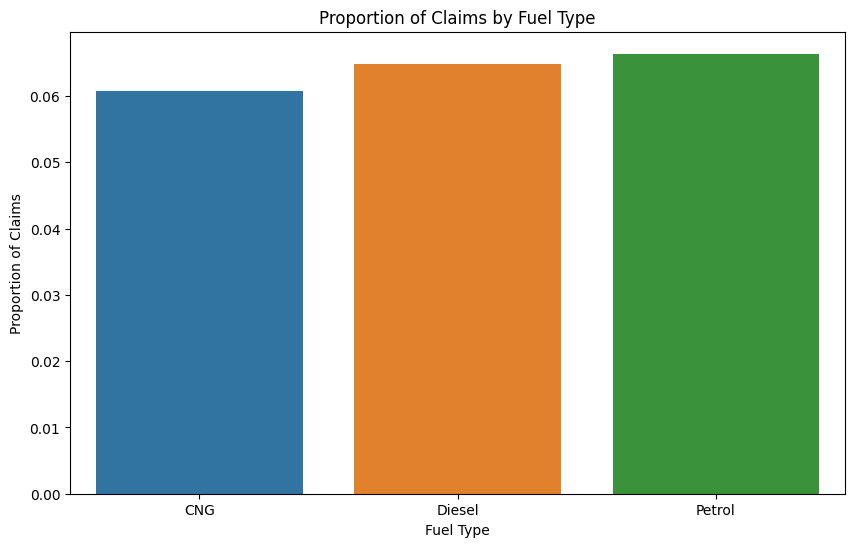

In [20]:
# Bar plot for proportion of claims by fuel_type
plt.figure(figsize=(10, 6))
sns.barplot(x='fuel_type', y='claim_proportion', data=fuel_type_grouped, hue='fuel_type')
plt.title('Proportion of Claims by Fuel Type')
plt.xlabel('Fuel Type')
plt.ylabel('Proportion of Claims')
plt.show()

> Total claims in the three different fuel groups are pretty close to each other. The absolute number of claims does not vary dramatically between fuel types.  
> Total policies in the three different groups are relatively close to each other.

### Handling Class Imbalance

In [21]:
# separate majority and minority classes
majority = dataset[dataset.claim_status == 0]
minority = dataset[dataset.claim_status == 1]

In [22]:
# oversample the minority class
minority_oversampled = resample(minority,
                                replace=True,
                                n_samples=len(majority),
                                random_state=42)

In [23]:
# combine majority class with oversampled minority class
oversampled_data = pd.concat([majority, minority_oversampled])

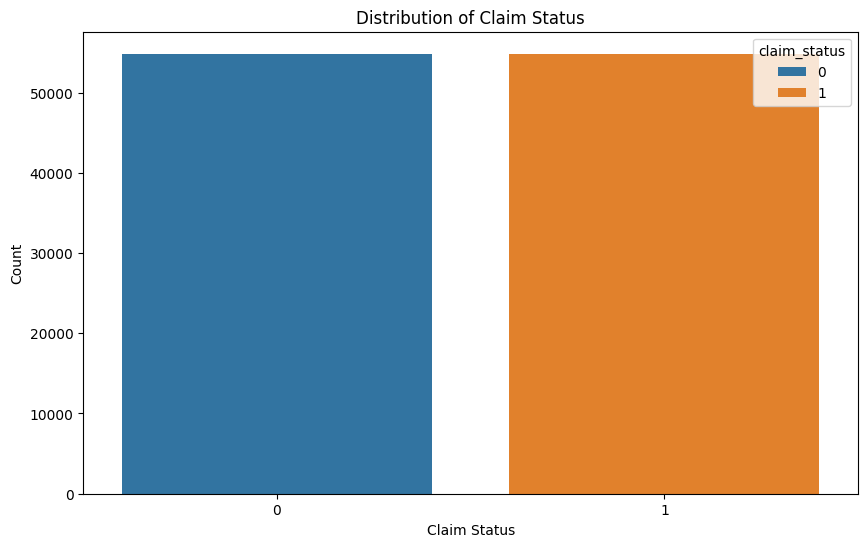

In [25]:
plt.figure(figsize=(10, 6))
sns.countplot(x='claim_status', data=oversampled_data, hue='claim_status')
plt.title('Distribution of Claim Status')
plt.xlabel('Claim Status')
plt.ylabel('Count')
plt.show()

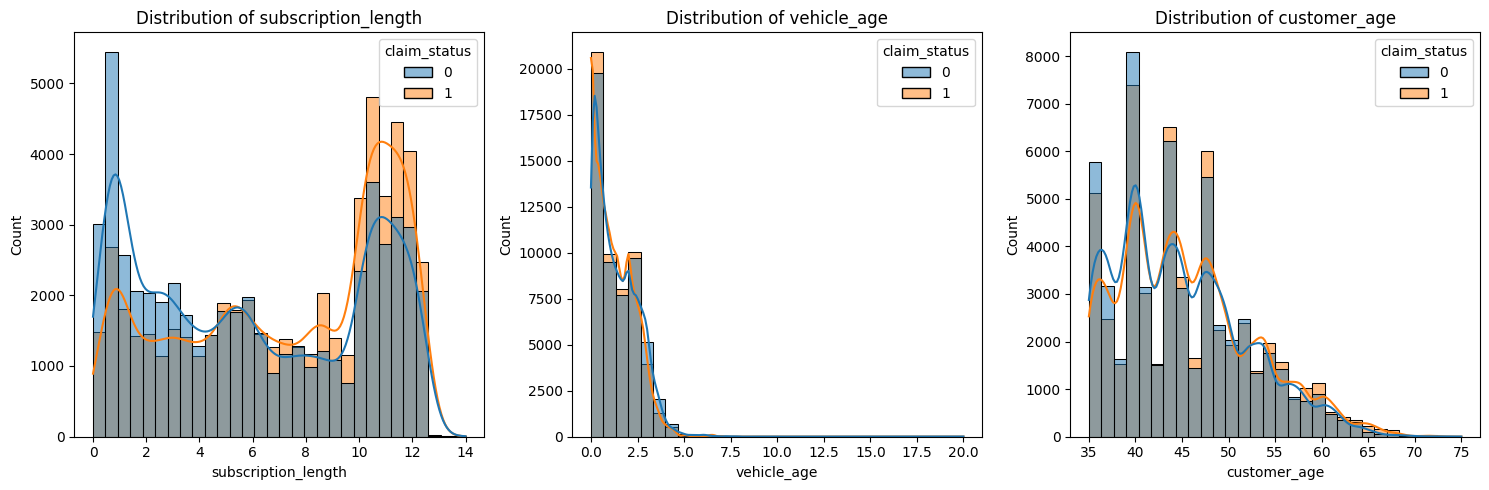

In [29]:
# selecting numerical columns for analysis
numerical_columns = ['subscription_length', 'vehicle_age', 'customer_age']

# plotting distributions of numerical features
plt.figure(figsize=(15, 5))
for i, column in enumerate(numerical_columns, 1):
    plt.subplot(1, 3, i)
    sns.histplot(data=oversampled_data, x=column, bins=30, kde=True, hue='claim_status')
    plt.title(f'Distribution of {column}')

plt.tight_layout()
plt.show()

> The oversampled data does look like the original data.

### Feature Selection

In [31]:
# encode categorical variables
le = LabelEncoder()
encoded_data = dataset.apply(lambda col: le.fit_transform(col) if col.dtype == 'object' else col)

In [32]:
# separate features and target variable
X = encoded_data.drop('claim_status', axis=1)
y = encoded_data['claim_status']

In [ ]:
# create a random forest classifier model
rf_model = RandomForestClassifier(random_state=42)
rf_model.fit(X, y)

In [34]:
# get feature importance
feature_importance = rf_model.feature_importances_

# create a dataframe for visualization of feature importance
features_df = pd.DataFrame({'Feature': X.columns, 'Importance': feature_importance})
features_df = features_df.sort_values(by='Importance', ascending=False)

print(features_df.head(10))  # displaying the top 10 important features

                Feature  Importance
0             policy_id    0.321072
1   subscription_length    0.248309
3          customer_age    0.176639
2           vehicle_age    0.135190
5        region_density    0.053838
4           region_code    0.052649
7                 model    0.000957
24               length    0.000846
26         gross_weight    0.000834
11          engine_type    0.000791


The top 10 most important variables for predicting insurance frequency claims, according to the Random Forest model, are:

1. policy_id: Unique identifier for the insurance policy
2. subscription_length: Length of the insurance subscription
3. customer_age: Age of the customer
4. vehicle_age: Age of the vehicle
5. region_density: Population density of the region
6. region_code: Code representing the region
7. model: Model of the vehicle
8. engine_type: Type of engine in the vehicle
9. gross_weight: Gross weight of the vehicle
10. length: Length of the vehicle